In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
trainingFolder = r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data' #fodler with manually labelled data
for doc in os.listdir(trainingFolder):
    print(doc)

labellediphone5s.csv
labelleds22ultra.csv
rawLabelNoLossOneplus.csv
rawLabelNoLossPixel.csv
rawLabelNoLossSony.csv
ToAugment
tolabelAsus.csv


In [3]:
iphoneDF = pd.read_csv(f'{trainingFolder}/labellediphone5s.csv')
samsungDF = pd.read_csv(f'{trainingFolder}/labelleds22ultra.csv')
OnePlus = pd.read_csv(f'{trainingFolder}/rawLabelNoLossOneplus.csv')
Pixel = pd.read_csv(f'{trainingFolder}/rawLabelNoLossPixel.csv')
Sony = pd.read_csv(f'{trainingFolder}/rawLabelNoLossSony.csv')
Asus = pd.read_csv(f'{trainingFolder}/tolabelAsus.csv')


In [4]:
Sony = pd.read_csv(f'{trainingFolder}/rawLabelNoLossSony.csv')
AllPhoneData = [iphoneDF, samsungDF, OnePlus, Pixel,Asus,Sony] #list of dataframes

In [8]:
for i in AllPhoneData:
    if 'trueLabel' in i.columns:
        print(" is good to go")
    else:
        print('is missing it')

 is good to go
 is good to go
 is good to go
 is good to go
 is good to go
 is good to go


In [6]:
AllPhoneData = [df[['combined_text', 'trueLabel']] for df in AllPhoneData]
AllPhoneData #combine the DFs into a list with their text and manually labelled true label

[                                        combined_text          trueLabel
 0   Okay, hey, what is up guys? I'm Kay Bhd here a...            Unknown
 1   But sometimes when you use the device for a wh...            Unknown
 2   From the perspective of a person who uses a lo...            Unknown
 3   Believe it or not, this took me like seven iPh...            Unknown
 4   So this is the iPhone 5s in Space Gray. It com...             Design
 ..                                                ...                ...
 79  I just wish it was bigger and there are a lot ...  Screen or Display
 80  No creaking or bending at all. So there are so...  Screen or Display
 81  User. If you want to see a full dedicated iOS ...            Unknown
 82  But either way, this has been it. This is the ...            Unknown
 83  Thank you for watching the review and I'll tal...            Unknown
 
 [84 rows x 2 columns],
                                         combined_text trueLabel
 0   [Music] Hey, wha

In [7]:
iphoneDF, samsungDF, OnePlus, Pixel, Asus, Sony = AllPhoneData
fullDF = pd.concat(AllPhoneData, axis=0, ignore_index=True) #convert back into a dataframe

In [12]:
# Create a mapping dictionary
label_map = {
    'Unknown': 'Unknown',
    'unknown': 'Unknown',
    'Screen': 'Screen or Display',
    'screen or display': 'Screen or Display' # if there's a lowercase version
    # Correcting typos I found
}

# Replace the values
fullDF['trueLabel'] = fullDF['trueLabel'].replace(label_map) #All types corrected

# Get the value counts again
x = fullDF['trueLabel'].value_counts()
print(x)


trueLabel
Camera                 133
Unknown                108
Phone performance       78
Design                  58
Battery or Charging     44
Screen or Display       37
Price                   23
Build quality           13
Name: count, dtype: int64


In [13]:
!pip install matplotlib 



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


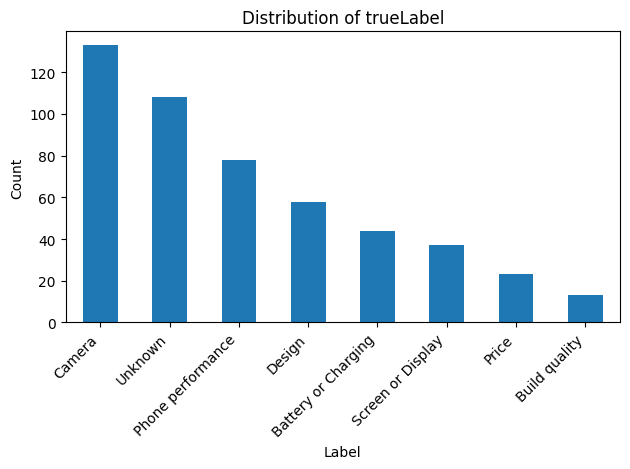

In [14]:
import matplotlib.pyplot as plt

# Assess the distribution. We can see there is an imbalance.
x.plot(kind='bar')

plt.title('Distribution of trueLabel')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


now we see the distirbution so now we will subset each dataframe to allow us to augment the number with some chat gpt comments that are similar

In [15]:
unknownOnly = fullDF[fullDF['trueLabel'] == 'Unknown']
CameraOnly = fullDF[fullDF['trueLabel'] == 'Camera']
phonePErformanceOnly = fullDF[fullDF['trueLabel'] == 'Phone performance']
DesignOnly = fullDF[fullDF['trueLabel'] == 'Design']
batteryOnly = fullDF[fullDF['trueLabel'] == 'Battery or Charging']
ScreenOnly = fullDF[fullDF['trueLabel'] == 'Screen or Display']
priceOnly = fullDF[fullDF['trueLabel'] == 'Price']
buildOnly = fullDF[fullDF['trueLabel'] == 'Build quality']
#We subset the data and will manually label and add more comments using data augmentation techniques

In [16]:
# unknownOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\unknown.csv', index=False)
# CameraOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\camera.csv', index=False)
# phonePErformanceOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\Performance.csv', index=False)
# DesignOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\design.csv', index=False)
# batteryOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\battery.csv', index=False)
# ScreenOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\screen.csv', index=False)
# priceOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\price.csv', index=False)
# buildOnly.to_csv(r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment\build.csv', index=False)

In [17]:
fullDF 

,combined_text,trueLabel
0,"Okay, hey, what is up guys? I'm Kay Bhd here a...",Unknown
1,But sometimes when you use the device for a wh...,Unknown
2,From the perspective of a person who uses a lo...,Unknown
3,"Believe it or not, this took me like seven iPh...",Unknown
4,So this is the iPhone 5s in Space Gray. It com...,Design
...,...,...
489,"Keep that, keep that, keep the taller and more...",Design
490,Definitely keep that. The flat screen with no ...,Design
491,The... and the... Stereo front-facing speaker ...,Design
492,All that would be so killer with some fast And...,Unknown


In [18]:
augmentationFolder = r'C:\Users\panas\OneDrive\Desktop\DataScience\PersonalProjects\PersonalNLP\Training Data\ToAugment'

In [19]:
batteryAugemntation = pd.read_csv(f'{augmentationFolder}/battery_augmented.csv')
buildAugemntation = pd.read_csv(f'{augmentationFolder}/build_augmented.csv')
cameraAugemntation = pd.read_csv(f'{augmentationFolder}/camera_augmented.csv')
designAugemntation = pd.read_csv(f'{augmentationFolder}/design _augmented.csv')
performaceAugemntation = pd.read_csv(f'{augmentationFolder}/Performance_augmented.csv')
priceAugemntation = pd.read_csv(f'{augmentationFolder}/price_augmented.csv')
screenAugemntation = pd.read_csv(f'{augmentationFolder}/screen_augmented.csv') #augemented dataframes uploaded with a higher quantity of data

In [20]:
allAugmentation = [batteryAugemntation, buildAugemntation,cameraAugemntation,designAugemntation, performaceAugemntation,priceAugemntation,screenAugemntation]
fullAugment = pd.concat(allAugmentation, axis=0, ignore_index=True)
allTrainingData =  pd.concat([fullAugment, fullDF], ignore_index=True, sort=False)
allTrainingData #All labelled training data

In [23]:
# Create a mapping dictionary
label_map = {
    'Unknown': 'Unknown',
    'unknown': 'Unknown',
    'Screen': 'Screen or Display',
    'screen or display': 'Screen or Display' # if there's a lowercase version
    # Add more mappings as needed
}

# Replace the values
allTrainingData['trueLabel'] = allTrainingData['trueLabel'].replace(label_map)
y = allTrainingData['trueLabel'].value_counts() 
print(y) #higher data quantity

trueLabel
Camera                 183
Phone performance      128
Design                 108
Unknown                108
Battery or Charging     94
Screen or Display       87
Price                   73
Build quality           63
Name: count, dtype: int64


#Training Day

make appropriate for set fit
rename columsn to text, label and label text
give a numberical for each class

In [24]:
dataForSetFit = allTrainingData

In [25]:
def create_mappings(df, column_name='trueLabel'):
    """Create label to integer and integer to label mappings."""
    label_to_int = {label: idx for idx, label in enumerate(df[column_name].unique())}
    int_to_label = {idx: label for label, idx in label_to_int.items()}
    return label_to_int, int_to_label

def map_labels_to_int(df, label_to_int, column_name='trueLabel'):
    """Map labels in a DataFrame column to integers."""
    df[f"{column_name}_num"] = df[column_name].map(label_to_int)
    return df

def map_int_to_labels(df, int_to_label, column_name='trueLabel'):
    """Map integers in a DataFrame column back to labels."""
    df[f"reconstructed_{column_name}"] = df[f"{column_name}_num"].map(int_to_label)
    return df

#When training using set fit, classes need to be in int form (creating_numbers), we want to have the correct mapping and then convert them to back to text for legibility


In [26]:
label_to_int, int_to_label = create_mappings(dataForSetFit)
dataForSetFit = map_labels_to_int(dataForSetFit, label_to_int)
dataForSetFit = map_int_to_labels(dataForSetFit, int_to_label)

In [36]:
int_to_label

{0: 'Battery or Charging',
 1: 'Build quality',
 2: 'Camera',
 3: 'Design',
 4: 'Phone performance',
 5: 'Price',
 6: 'Screen or Display',
 7: 'Unknown'}

In [27]:
dataForSetFit
dataForSetFit = dataForSetFit[['combined_text',	'trueLabel',	'trueLabel_num']] #data to train model
dataForSetFit

,combined_text,trueLabel,trueLabel_num
0,The battery life on this phone is impressive.,Battery or Charging,0
1,I'm so glad I don't have to charge my phone mu...,Battery or Charging,0
2,"The battery lasts all day, even with heavy usage.",Battery or Charging,0
3,I was out all day and didn't have to charge my...,Battery or Charging,0
4,It's refreshing to see a phone with such good ...,Battery or Charging,0
...,...,...,...
839,"Keep that, keep that, keep the taller and more...",Design,3
840,Definitely keep that. The flat screen with no ...,Design,3
841,The... and the... Stereo front-facing speaker ...,Design,3
842,All that would be so killer with some fast And...,Unknown,7


In [28]:
dataForSetFit = dataForSetFit.rename(columns={
    'combined_text': 'text',
    'trueLabel': 'label_text',
    'trueLabel_num': 'label'
}) #meet naming requirements for setFit


In [29]:
!pip install setfit



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
from datasets import load_dataset
from sentence_transformers.losses import CosineSimilarityLoss

from setfit import SetFitModel, SetFitTrainer


In [31]:
!pip install datasets



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
from datasets import Dataset, DatasetDict
dataset = Dataset.from_pandas(dataForSetFit) #SetFit requires Dataset format

In [33]:
print(dataset)


Dataset({
    features: ['text', 'label_text', 'label'],
    num_rows: 844
})


In [34]:
from datasets import concatenate_datasets

samples_per_class_train = 45

train_subsets = []
test_subsets = []

# For each unique label, split the data into training and testing sets
for label_value in dataset.unique("label"):
    total_samples = dataset.filter(lambda x: x['label'] == label_value).num_rows
    
    if total_samples > samples_per_class_train: # Ensure there's enough samples to split
        train_subset = dataset.filter(lambda x: x['label'] == label_value).shuffle(seed=42).select(range(samples_per_class_train))
        test_subset = dataset.filter(lambda x: x['label'] == label_value).shuffle(seed=42).select(range(samples_per_class_train, total_samples))
        
        train_subsets.append(train_subset)
        test_subsets.append(test_subset)
    else:
        print(f"Label {label_value} has less than {samples_per_class_train} samples. Adjust the samples_per_class_train or consider dropping this class.")

# Concatenate all subsets to get the final datasets
train_ds = concatenate_datasets(train_subsets)
test_ds = concatenate_datasets(test_subsets)


Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

Filter:   0%|          | 0/844 [00:00<?, ? examples/s]

In [35]:
# Load SetFit model from Hub
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-mpnet-base-v2")

# Create trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    loss_class=CosineSimilarityLoss,
    batch_size=16,
    num_iterations=20, # Number of text pairs to generate for contrastive learning
    num_epochs=1 # Number of epochs to use for contrastive learning
)



KeyboardInterrupt: 

In [ ]:
# Traiing and evaluating - extremely time consuming (300+ minutes)
trainer.train()
metrics = trainer.evaluate()


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 14400
  Num epochs = 1
  Total optimization steps = 900
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/900 [00:00<?, ?it/s]

***** Running evaluation *****


In [ ]:
!pip install ipywidgets


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\panas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from transformers import AutoModel

access_token = #Your huggingFaceToken


In [ ]:
from huggingface_hub import notebook_login

huggingface_hub.login()


In [ ]:
your_token = access_token# Replace with your token
trainer.push_to_hub("datanash/mkbhd5pillars", token=your_token) #Export trained model to hugging face


Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model_head.pkl:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

'https://huggingface.co/datanash/mkbhd5pillars/tree/main/'